In [73]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [74]:
df_open = pd.read_csv("20240123_openwork.csv")
names = df_open["企業名"].tolist()
keywords = df_open["URL"].tolist()

view_list = ["jsAveTotal","jsAveSatisfy","jsAveSpirit","jsAveAiry","jsAveTeam","jsAveJunior","jsAveSenior","jsAveLaw","jsAveAssess","jsAveOvertime","jsAveWithpay"]
view_list_jpn = ["総合評価","待遇面の満足度","社員の士気","風通しの良さ","社員の相互尊重","20代成長環境","人材の長期育成","法令順守意識","人事評価の適正感","残業時間（月間）","有給休暇消化率"]

In [75]:
df_open

,サービス,企業名,URL,総合評価-1,総合評価-2,総合評価-3,総合評価-4,待遇面の満足度-1,待遇面の満足度-2,待遇面の満足度-3,...,残業時間（月間）-1,残業時間（月間）-2,残業時間（月間）-3,残業時間（月間）-4,残業時間（月間）-5,有給休暇消化率-1,有給休暇消化率-2,有給休暇消化率-3,有給休暇消化率-4,有給休暇消化率-5
0,PWD,パーソルワークスデザイン,https://www.openwork.jp/company.php?m_id=a0C30...,8,71,57,3,27,63,40,...,66,43,23,1,6,10,13,17,14,83
1,RPO,レジェンダ,https://www.openwork.jp/company.php?m_id=a0910...,4,19,56,13,15,39,28,...,10,21,34,15,12,18,25,18,10,14
2,RPO,トライアンフ,https://www.openwork.jp/company.php?m_id=a0910...,1,18,26,10,12,11,17,...,8,25,8,0,14,11,11,6,9,13
3,RPO,マンパワーグループ,https://www.openwork.jp/company.php?m_id=a0910...,8,148,137,18,20,92,149,...,97,113,56,24,21,51,50,53,37,109
4,RPO,ディスコ,https://www.openwork.jp/company.php?m_id=a0910...,7,122,98,12,18,72,109,...,32,52,75,33,47,62,54,41,14,59
5,RPO,マイナビ,https://www.openwork.jp/company.php?m_id=a0910...,36,918,1217,190,111,448,1032,...,306,589,1097,231,138,500,530,504,275,526
6,RPO,ネオキャリア,https://www.openwork.jp/company.php?m_id=a0910...,14,352,359,94,237,303,215,...,71,140,289,118,201,330,116,122,74,175
7,RPO,パソナ,https://www.openwork.jp/company.php?m_id=a0910...,18,298,603,103,125,358,379,...,213,293,274,133,109,199,268,173,138,205
8,RPO,ONE,https://www.openwork.jp/company.php?m_id=a0C30...,2,22,17,0,11,15,13,...,11,22,6,2,0,10,4,8,2,17
9,RPO,クリークアンドリバー,https://www.openwork.jp/company.php?m_id=a0910...,9,153,106,16,46,116,100,...,52,85,71,33,43,57,32,51,30,103


In [76]:
for k in range(11):
    df = pd.DataFrame()
    for n in range(0,1):
        count_list=[]
        for i in range(1,5):
            column = view_list_jpn[n]+"-"+str(i)
            star = df_open[column][k]
            for a in range(1,int(star)+1):
                count_list.append(i)
        main = pd.Series(count_list)
        df = pd.concat([df,main],axis=1)

    for n in range(1,11):
        count_list=[]
        for i in range(1,6):
            column = view_list_jpn[n]+"-"+str(i)
            star = df_open[column][k]
            for a in range(1,int(star)+1):
                count_list.append(i)
        main = pd.Series(count_list)
        df = pd.concat([df,main],axis=1)
    df.columns = view_list_jpn

    df["残業時間（月間）"] = (df["残業時間（月間）"]-1)*20
    df["有給休暇消化率"] = (df["有給休暇消化率"]-1)*20

    corpo_name = df_open["企業名"][k]
    csv_name = corpo_name + "_openwork-PWD.csv"
    df.to_csv(csv_name,encoding="shift-jis")

In [77]:
df

,総合評価,待遇面の満足度,社員の士気,風通しの良さ,社員の相互尊重,20代成長環境,人材の長期育成,法令順守意識,人事評価の適正感,残業時間（月間）,有給休暇消化率
0,1,1.0,2.0,1,2,1,1,1,1,0,0.0
1,2,1.0,2.0,1,2,2,1,1,1,0,0.0
2,2,1.0,2.0,1,2,2,1,1,1,0,0.0
3,2,1.0,2.0,2,2,2,1,1,1,0,0.0
4,2,1.0,2.0,2,2,2,1,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
317,4,5.0,5.0,5,5,5,5,5,5,80,NaN
318,4,5.0,5.0,5,5,5,5,5,5,80,NaN
319,4,NaN,NaN,5,5,5,5,5,5,80,NaN
320,4,NaN,NaN,5,5,5,5,5,5,80,NaN


In [93]:
df_other = pd.DataFrame()

for k in range(1,11):

    corpo_name = df_open["企業名"][k]
    csv_name = corpo_name + "_openwork-PWD.csv"
    df_csv = pd.read_csv(csv_name,encoding="shift-jis")
    df_other = pd.concat([df_other,df_csv],axis=0,ignore_index=True)
df_other = df_other.drop(df_other.columns[:1],axis=1)

In [94]:
df_other

,総合評価,待遇面の満足度,社員の士気,風通しの良さ,社員の相互尊重,20代成長環境,人材の長期育成,法令順守意識,人事評価の適正感,残業時間（月間）,有給休暇消化率
0,1,1.0,1.0,1,1,1,1,1,1,0,0.0
1,1,1.0,2.0,2,2,1,1,1,1,0,0.0
2,1,1.0,2.0,2,2,1,1,2,1,0,0.0
3,1,1.0,2.0,2,2,1,1,2,1,0,0.0
4,2,1.0,2.0,2,2,2,1,2,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5541,4,5.0,5.0,5,5,5,5,5,5,80,NaN
5542,4,5.0,5.0,5,5,5,5,5,5,80,NaN
5543,4,NaN,NaN,5,5,5,5,5,5,80,NaN
5544,4,NaN,NaN,5,5,5,5,5,5,80,NaN


In [96]:
df_pwd = pd.read_csv("パーソルワークスデザイン_openwork-PWD.csv",encoding="shift-jis")
df_pwd = df_pwd.drop(df_pwd.columns[:1],axis=1)
df_pwd

,総合評価,待遇面の満足度,社員の士気,風通しの良さ,社員の相互尊重,20代成長環境,人材の長期育成,法令順守意識,人事評価の適正感,残業時間（月間）,有給休暇消化率
0,1,1,1,1,1,1,1,1,1,0,0.0
1,1,1,1,1,1,1,1,2,1,0,0.0
2,1,1,1,1,1,1,1,2,1,0,0.0
3,1,1,1,1,1,1,1,2,1,0,0.0
4,1,1,1,1,1,1,1,2,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
134,3,4,4,5,5,5,4,5,4,80,80.0
135,3,4,4,5,5,5,4,5,4,80,80.0
136,4,4,4,5,5,5,4,5,4,80,80.0
137,4,4,4,5,5,5,4,5,4,80,NaN


In [97]:
for item in view_list_jpn:
    len0 = np.array(df_pwd[item].dropna())
    len1 = np.array(df_other[item].dropna())
    t,p = stats.ttest_ind(len0,len1, equal_var=False)
    if p <0.05:
        print("〇"+item + "："+str(p))
        distinct = np.mean(len0) - np.mean(len1)
        print("PWD："+str(np.mean(len0)))
        print("他社："+str(np.mean(len1)))
        print("PWDの方が "+str(distinct)+" 大きい")
    else:
        print("〇"+item+"は同じと言える")

〇総合評価：2.4239518063359466e-07
PWD：2.3956834532374103
他社：2.6905878110349803
PWDの方が -0.29490435779757007 大きい
〇待遇面の満足度：5.115455234453631e-12
PWD：2.223021582733813
他社：2.764159533782553
PWDの方が -0.5411379510487402 大きい
〇社員の士気：1.0341188962300867e-21
PWD：2.58273381294964
他社：3.2664359861591694
PWDの方が -0.6837021732095292 大きい
〇風通しの良さ：0.00031592264932984776
PWD：3.1223021582733814
他社：3.4116480346195455
PWDの方が -0.28934587634616404 大きい
〇社員の相互尊重：0.013060401013865195
PWD：3.0863309352517985
他社：3.283808150018031
PWDの方が -0.19747721476623248 大きい
〇20代成長環境：1.3931736602199484e-17
PWD：2.741007194244604
他社：3.592138478182474
PWDの方が -0.8511312839378697 大きい
〇人材の長期育成は同じと言える
〇法令順守意識：2.6811993158468848e-17
PWD：3.935251798561151
他社：3.179228272628922
PWDの方が 0.7560235259322292 大きい
〇人事評価の適正感：2.3464171575949676e-12
PWD：2.431654676258993
他社：3.0861882437793002
PWDの方が -0.6545335675203074 大きい
〇残業時間（月間）：2.90252165557214e-20
PWD：16.690647482014388
他社：35.5751893256401
PWDの方が -18.884541843625716 大きい
〇有給休暇消化率：1.7229903111384625e-18


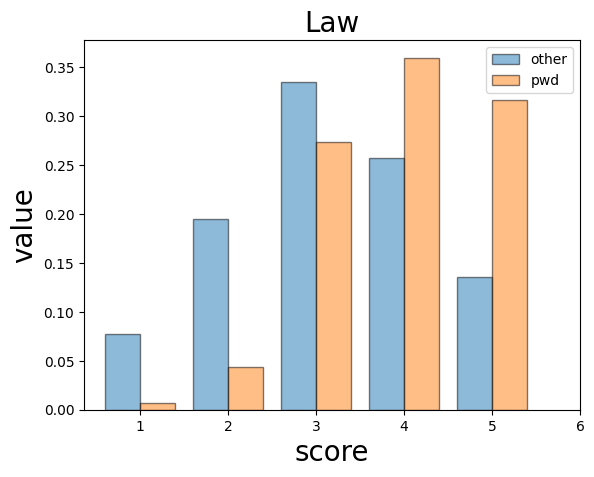

In [98]:
column = "法令順守意識"

other = df_other[column]
pwd = df_pwd[column]

plt.xlabel("score",fontsize=20)
plt.ylabel("value",fontsize=20)
plt.title("Law", fontsize=20)

bins=range(1,7,1)
plt.hist([other,pwd],bins,ec="black",label=["other","pwd"], alpha = 0.5, density=True,align="left")

plt.xticks(np.arange(1,7,1))

plt.legend()
plt.show()

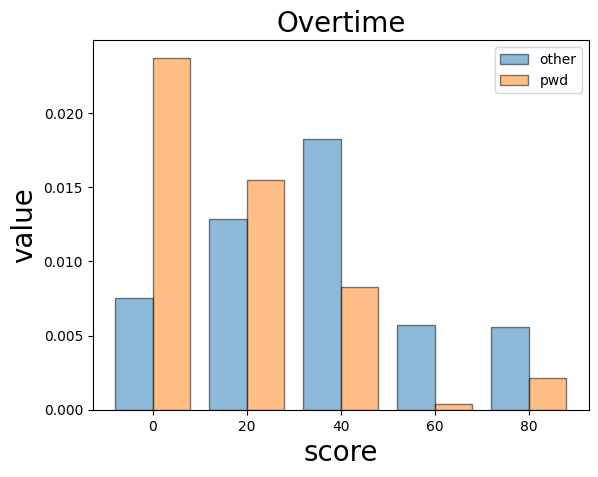

In [99]:
column = "残業時間（月間）"

other = df_other[column]
pwd = df_pwd[column]

plt.xlabel("score",fontsize=20)
plt.ylabel("value",fontsize=20)
plt.title("Overtime", fontsize=20)

bins=range(0,110,20)
plt.hist([other,pwd],bins,ec="black",label=["other","pwd"], alpha = 0.5, density=True,align="left")

plt.xticks(np.arange(0,100,20))

plt.legend()
plt.show()

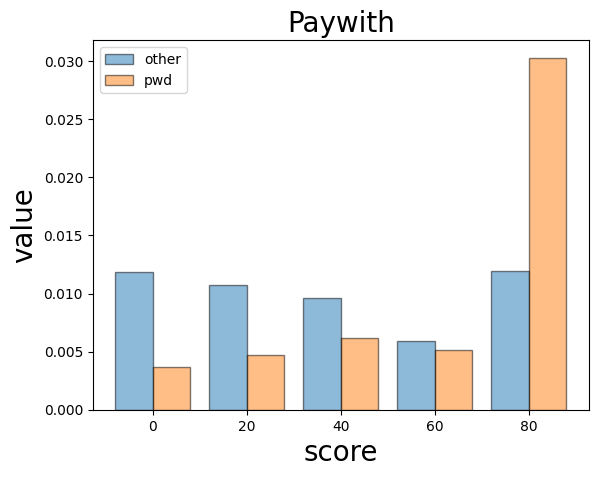

In [100]:
column = "有給休暇消化率"

other = df_other[column]
pwd = df_pwd[column]

plt.xlabel("score",fontsize=20)
plt.ylabel("value",fontsize=20)
plt.title("Paywith", fontsize=20)

bins=range(0,110,20)
plt.hist([other,pwd],bins,ec="black",label=["other","pwd"], alpha = 0.5, density=True,align="left")

plt.xticks(np.arange(0,100,20))

plt.legend()
plt.show()

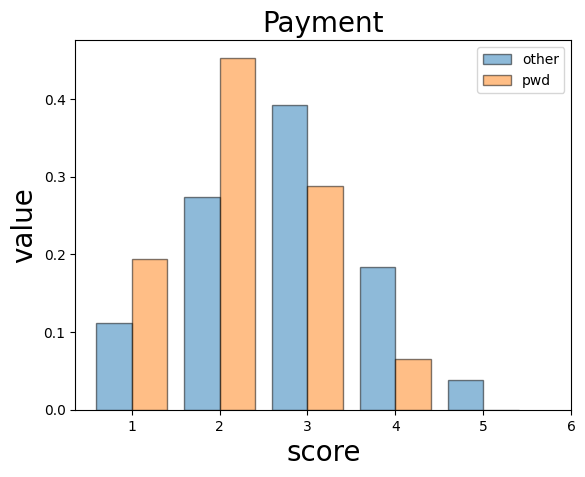

In [20]:
column = "待遇面の満足度"

other = df_other[column]
pwd = df_pwd[column]

plt.xlabel("score",fontsize=20)
plt.ylabel("value",fontsize=20)
plt.title("Payment", fontsize=20)

bins=range(1,7,1)
plt.hist([other,pwd],bins,ec="black",label=["other","pwd"], alpha = 0.5, density=True,align="left")

plt.xticks(np.arange(1,7,1))

plt.legend()
plt.show()

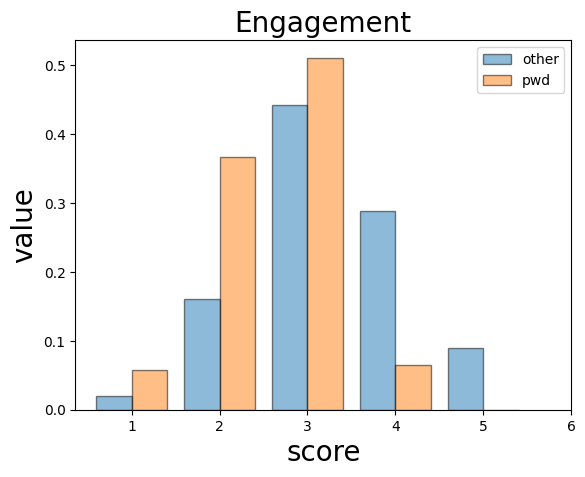

In [101]:
column = "社員の士気"

other = df_other[column]
pwd = df_pwd[column]

plt.xlabel("score",fontsize=20)
plt.ylabel("value",fontsize=20)
plt.title("Engagement", fontsize=20)

bins=range(1,7,1)
plt.hist([other,pwd],bins,ec="black",label=["other","pwd"], alpha = 0.5, density=True,align="left")

plt.xticks(np.arange(1,7,1))

plt.legend()
plt.show()